In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import geopandas as gpd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline 


In [43]:
reviews = pd.read_csv('data/yelp.csv', index_col=0)



In [44]:
#this column is empty 
reviews.drop('business_neighborhoods', axis=1, inplace=True)

In [45]:
#i want to only deal with restaurants 
reviews = reviews[reviews['business_categories'].str.contains('Restaurant') == True]

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158430 entries, 0 to 229905
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   business_blank          158430 non-null  bool   
 1   business_categories     158430 non-null  object 
 2   business_city           158430 non-null  object 
 3   business_full_address   158430 non-null  object 
 4   business_id             158430 non-null  object 
 5   business_latitude       158430 non-null  float64
 6   business_longitude      158430 non-null  float64
 7   business_name           158430 non-null  object 
 8   business_open           158430 non-null  bool   
 9   business_review_count   158430 non-null  int64  
 10  business_stars          158430 non-null  float64
 11  business_state          158430 non-null  object 
 12  business_type           158430 non-null  object 
 13  cool                    158430 non-null  int64  
 14  date                

In [46]:
#there are six entries with no text review, going to drop 
no_rev = reviews[pd.isna(reviews['text']) == True].index 
reviews.drop(labels=no_rev, axis=0, inplace=True)

In [47]:
reviews = reviews.reset_index().drop('index', axis=1)

In [48]:
reviews.columns

Index(['business_blank', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_open',
       'business_review_count', 'business_stars', 'business_state',
       'business_type', 'cool', 'date', 'funny', 'review_id',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count',
       'reviewer_type', 'reviewer_useful', 'stars', 'text', 'type', 'useful',
       'user_id'],
      dtype='object')

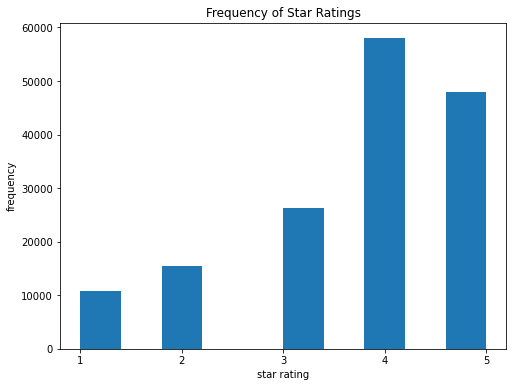

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(reviews['stars'], align='mid')
ax.set_xticks(np.arange(1,6))
ax.set_xlabel('star rating')
ax.set_ylabel('frequency')
ax.set_title('Frequency of Star Ratings')
plt.savefig('img/ratings-hist.png')


In [50]:
lem = WordNetLemmatizer()
stopwords = stopwords.words('english')

In [51]:
texts = []
for rev in reviews['text'].values:
    review = [lem.lemmatize(word).lower() for word in rev.split(' ') \
              if word not in stopwords and word.isalpha()==True]
    texts.append(" ".join(review))

In [ ]:
vect = TfidfVectorizer(stop_words='english', max_features=5000)
vectorized = vect.fit_transform(texts)


In [71]:
vectorized.shape

(158424, 65943)

In [72]:
#want to start developing topics:LDA? 
